In [95]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import time as t
import datetime as dt
import string as st
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from numpy import genfromtxt
import math as m
from __future__ import print_function

In [96]:
X_matrix = np.genfromtxt('Martrix_X_streamingserver.csv', delimiter=';');
#Y_matrix = np.genfromtxt('Martrix_Y_streamingserver.csv', delimiter=';');
y = np.genfromtxt('Martrix_Y_streamingserver.csv',delimiter=';')

#data = [1] * 3 + [2] * 3
#data *= 3
data = y;
print(data)

[ 6.9375      7.53333333  6.33333333 ...,  6.33333333  8.          7.53333333]


In [97]:
from pybrain.datasets import SequentialDataSet
from itertools import cycle

ds = SequentialDataSet(1, 1)
for sample, next_sample in zip(data, cycle(data[1:])):
    ds.addSample(sample, next_sample)

In [98]:
from pybrain.tools.shortcuts import buildNetwork
from pybrain.structure.modules import LSTMLayer

net = buildNetwork(1, 5, 1, 
                   hiddenclass=LSTMLayer, outputbias=False, recurrent=True)

In [99]:
from pybrain.supervised import RPropMinusTrainer
from sys import stdout

trainer = RPropMinusTrainer(net, dataset=ds)
train_errors = [] # save errors for plotting later
EPOCHS_PER_CYCLE = 5
CYCLES = 100
EPOCHS = EPOCHS_PER_CYCLE * CYCLES
for i in xrange(CYCLES):
    trainer.trainEpochs(EPOCHS_PER_CYCLE)
    train_errors.append(trainer.testOnData())
    epoch = (i+1) * EPOCHS_PER_CYCLE
    print("\r epoch {}/{}".format(epoch, EPOCHS), end="")
    stdout.flush()

print()
print("final error =", train_errors[-1])

 epoch 500/500
final error = 1.65987949037


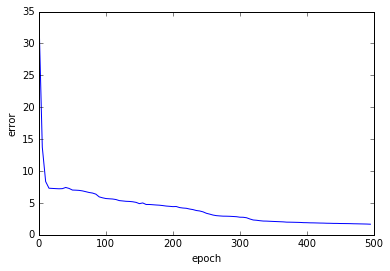

In [100]:
import matplotlib.pyplot as plt

plt.plot(range(0, EPOCHS, EPOCHS_PER_CYCLE), train_errors)
plt.xlabel('epoch')
plt.ylabel('error')

In [102]:
sample = y[10:30];
target = y[11:31];
error = 0.0;
for i in range(np.size(sample)):
    print("               sample = %4.1f" % sample[i])
    print("predicted next sample = %4.1f" % net.activate(sample[i]))
    print("   actual next sample = %4.1f" % target[i])
    #error += (sample[i] - net.activate(sample[i]))**2;
    print()
    
    
for i in range(np.size(y)-1):
    error += (y[i] - net.activate(y[i]))**2;
print('The error is Error = ', (error/np.size(y)))

               sample =  7.5
predicted next sample =  7.7
   actual next sample = 10.3

               sample = 10.3
predicted next sample =  6.4
   actual next sample =  6.4

               sample =  6.4
predicted next sample =  8.6
   actual next sample =  7.9

               sample =  7.9
predicted next sample =  7.3
   actual next sample =  6.3

               sample =  6.3
predicted next sample =  8.6
   actual next sample =  8.9

               sample =  8.9
predicted next sample =  6.8
   actual next sample =  6.5

               sample =  6.5
predicted next sample =  8.5
   actual next sample =  8.3

               sample =  8.3
predicted next sample =  7.1
   actual next sample =  7.5

               sample =  7.5
predicted next sample =  7.8
   actual next sample =  7.9

               sample =  7.9
predicted next sample =  7.5
   actual next sample =  7.9

               sample =  7.9
predicted next sample =  7.5
   actual next sample =  9.1

               sample =  9.1
pre